<a href="https://colab.research.google.com/github/yuliiakamen/Global-Omni-Channel-Sales-Analysis/blob/main/Strategic_Sales_and_Operations_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/MateAcademy/Python/Final_project


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MateAcademy/Python/Final_project


In [ ]:
# Uploading dataset
events = pd.read_csv("events.csv")
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


# Data overview

In [ ]:
print(events.shape)

(1330, 10)


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
print(events.dtypes)

Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object


In [ ]:
events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


### Basic description of EVENTS dataset

Total count of events: **1330**

Average units sold: **4952.201807**

50% of price: **154.06**

In [ ]:
countries = pd.read_csv("countries.csv")
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
print(countries.shape)

(249, 5)


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
countries.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [ ]:
products = pd.read_csv("products.csv")
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
print(products.shape)

(12, 2)


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
products.describe()

,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


The dataset follows a relational structure where `events.csv` serves as the fact table, containing transactional data, while `countries.csv` and `products`.csv act as lookup tables (dimensions).

To perform a comprehensive analysis, I enriched the sales events data by merging it with country and product metadata based on their respective IDs.

# Data cleaning

In [ ]:
print(events.isna().sum() / events.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


Data quality analysis revealed minor missingness. I performed listwise deletion for the `Units Sold` column (**0.15% missing**) as it had a negligible impact. For `Country Code`, which had a **6.17% missingness** rate, values were imputed with 'Unknown' to preserve transaction volume for overall analysis.

In [ ]:
# Drop the entire row if "Units Sold" is empty
events.dropna(subset=["Units Sold"], inplace=True)

In [ ]:
# Mark missing data in the "Country Code" column as "Unknown"
events["Country Code"] = events["Country Code"].fillna("Unknown")

In [ ]:
#checking for duplicates in data
duplicate_rows = events.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())


0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1328, dtype: bool
0


In [ ]:
# Transorm data type
events["Order Date"] = pd.to_datetime(events["Order Date"])

In [ ]:
events["Ship Date"] = pd.to_datetime(events["Ship Date"])

In [ ]:
# Total Revenue: how much money was received from customers
events["revenue"] = events["Units Sold"] * events["Unit Price"]

# Cost of Goods Sold (COGS): how much we spent on purchasing/producing these goods
events["Total_Cost"] = events["Units Sold"] * events["Unit Cost"]

# Net Profit
events["Profit"] = events["revenue"] - events["Total_Cost"]

In [ ]:
# Profit Margin (What percentage of the price is profit)
events["margin_percentage"] = (events["Profit"] / events["revenue"]) * 100

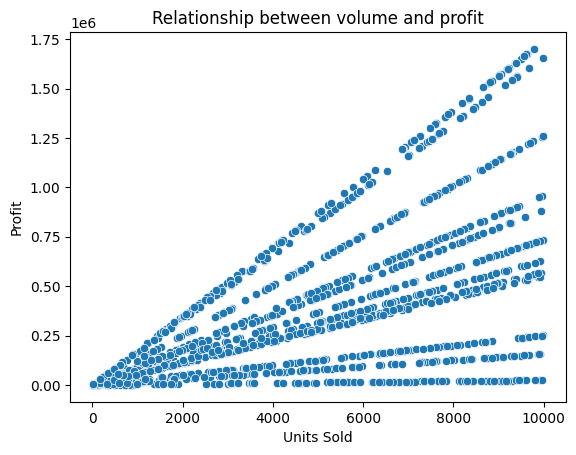

In [ ]:
sns.scatterplot(data=events, x="Units Sold", y="Profit")
plt.title("Relationship between volume and profit")
plt.show()

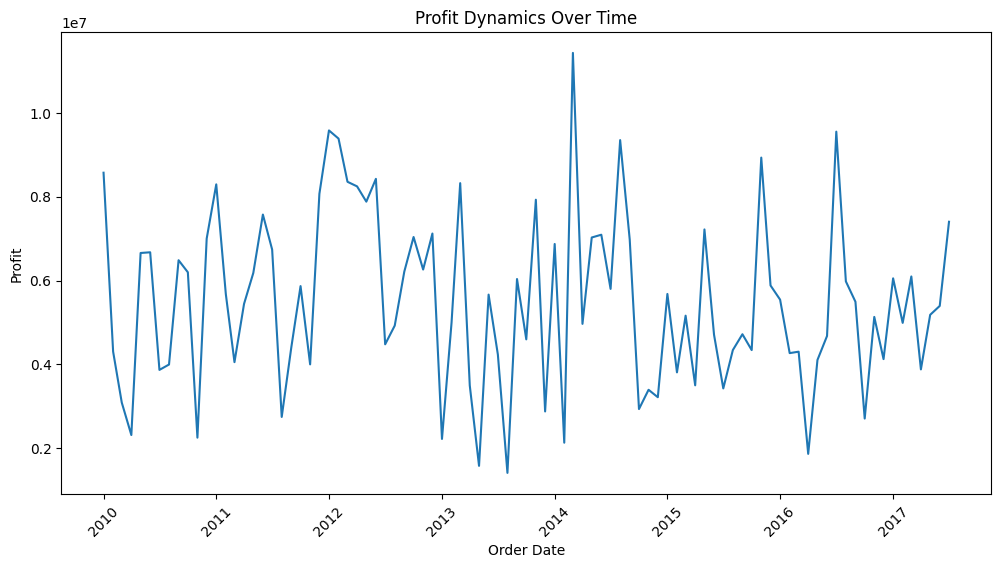

In [ ]:
monthly_data = events.groupby(events["Order Date"].dt.to_period("M"))["Profit"].sum().reset_index()
monthly_data["Order Date"] = monthly_data["Order Date"].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x="Order Date", y="Profit")
plt.title("Profit Dynamics Over Time")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# General statistics for numerical data
# Adding specific percentiles to see the "tails" of the distribution
print("--- Numerical Data Statistics ---")
print(events[["Units Sold", "Unit Price", "Unit Cost", "Profit"]].describe(percentiles=[.01, .25, .5, .75, .95, .99]))


--- Numerical Data Statistics ---
        Units Sold   Unit Price    Unit Cost        Profit
count  1328.000000  1328.000000  1328.000000  1.328000e+03
mean   4952.201807   264.913245   187.211521  3.775862e+05
std    2905.198996   217.386320   176.187801  3.691216e+05
min       2.000000     9.330000     6.920000  1.301400e+02
1%       75.510000     9.330000     6.920000  1.780875e+03
25%    2356.750000    81.730000    35.840000  8.491285e+04
50%    4962.000000   154.060000    97.440000  2.748680e+05
75%    7459.500000   437.200000   263.330000  5.477366e+05
95%    9450.200000   668.270000   524.960000  1.194800e+06
99%    9927.380000   668.270000   524.960000  1.600310e+06
max    9999.000000   668.270000   524.960000  1.700449e+06


The descriptive statistics indicate a healthy and well-distributed dataset. There are no negative profit values, suggesting a risk-free transaction model. The proximity of the mean and median for Units Sold implies a symmetrical distribution of order volumes. However, the top 1% of transactions generate a disproportionate amount of profit (up to 1.7M), confirming the presence of high-impact outliers that warrant separate strategic analysis.

In [ ]:
print(countries.isna().sum() / countries.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
print(products.isna().sum())


id           0
item_type    0
dtype: int64


In [ ]:
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,revenue,Total_Cost,Profit,margin_percentage
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50,43.067574
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87,43.067574
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89,24.799856
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24,67.203514
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68,33.003161


# Data analysis and visualization

In [ ]:
# 1. Join events with countries
df = events.merge(countries, left_on="Country Code", right_on="alpha-3", how="left")

# 2. Join with products
df = df.merge(products, left_on="Product ID", right_on="id", how="left")

# 3. Drop unnecessary and duplicate columns
cols_to_drop = ["alpha-2", "id", "alpha-3"]
df.drop(columns=cols_to_drop, inplace=True)

# 4. Rename
df.rename(columns={
    "name": "country_name",
    "item_type": "product_name",
    "region": "world_region"
}, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           1328 non-null   int64         
 1   Order Date         1328 non-null   datetime64[ns]
 2   Ship Date          1328 non-null   datetime64[ns]
 3   Order Priority     1328 non-null   object        
 4   Country Code       1328 non-null   object        
 5   Product ID         1328 non-null   int64         
 6   Sales Channel      1328 non-null   object        
 7   Units Sold         1328 non-null   float64       
 8   Unit Price         1328 non-null   float64       
 9   Unit Cost          1328 non-null   float64       
 10  revenue            1328 non-null   float64       
 11  Total_Cost         1328 non-null   float64       
 12  Profit             1328 non-null   float64       
 13  margin_percentage  1328 non-null   float64       
 14  country_

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,revenue,Total_Cost,Profit,margin_percentage,country_name,world_region,sub-region,product_name
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50,43.067574,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87,43.067574,Serbia,Europe,Southern Europe,Cereal
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89,24.799856,NaN,NaN,NaN,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24,67.203514,Montenegro,Europe,Southern Europe,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68,33.003161,Serbia,Europe,Southern Europe,Beverages


I performed a multi-table join to create a unified dataset. The events table was merged with countries and products using a left join strategy to ensure no transactional data was lost. Following the merge, redundant ID columns were dropped, and key features were renamed for better code readability and analytical consistency.

In [ ]:
print(df.isna().sum() / df.shape[0] * 100)

Order ID             0.000000
Order Date           0.000000
Ship Date            0.000000
Order Priority       0.000000
Country Code         0.000000
Product ID           0.000000
Sales Channel        0.000000
Units Sold           0.000000
Unit Price           0.000000
Unit Cost            0.000000
revenue              0.000000
Total_Cost           0.000000
Profit               0.000000
margin_percentage    0.000000
country_name         6.174699
world_region         6.174699
sub-region           6.174699
product_name         0.000000
dtype: float64


In [ ]:
# Mark missing data in the region column as "Unknown"
geo_cols = ["country_name", "world_region", "sub-region"]
df[geo_cols] = df[geo_cols].fillna("Other/Unknown")

print(df[geo_cols].isna().sum())

country_name    0
world_region    0
sub-region      0
dtype: int64


In [ ]:
#Rename colomns
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

While renaming columns is not a strict requirement for code execution, following the *PEP 8 naming convention* (*snake_case*) is highly recommended. It improves code consistency, eliminates issues with spaces in column names, and makes the data manipulation process more intuitive for other developers.

In [ ]:
df.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,revenue,total_cost,profit,margin_percentage,country_name,world_region,sub-region,product_name
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50,43.067574,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87,43.067574,Serbia,Europe,Southern Europe,Cereal
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89,24.799856,Other/Unknown,Other/Unknown,Other/Unknown,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24,67.203514,Montenegro,Europe,Southern Europe,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68,33.003161,Serbia,Europe,Southern Europe,Beverages


In [ ]:
# --- Key Performance Indicators (KPIs) Calculation ---

# Calculate total unique orders to measure transaction volume
total_orders = df["order_id"].nunique()

# Sum up total revenue to understand the gross financial scale
total_revenue = df["revenue"].sum()

# Sum up total profit to evaluate the bottom-line financial health
total_profit = df["profit"].sum()

# Sum up units sold to track physical inventory movement
total_units = df["units_sold"].sum()

# Calculate the mean margin percentage to assess operational efficiency
avg_margin = df["margin_percentage"].mean()

# Count unique country codes to determine the breadth of market reach
countries_reached = df["country_code"].nunique()

# --- Displaying the Results ---

print(f"--- KEY BUSINESS METRICS ---")
print(f"Total Number of Orders: {total_orders:,}")
print(f"Total Net Profit:      ${total_profit:,.2f}")
print(f"Total Gross Revenue:   ${total_revenue:,.2f}")
print(f"Market Reach:          {countries_reached} Countries")
print(f"Average Profit Margin: {avg_margin:.2f}%")
print(f"Total Units Sold:      {total_units:,.0f}")

--- KEY BUSINESS METRICS ---
Total Number of Orders: 1,328
Total Net Profit:      $501,434,459.00
Total Gross Revenue:   $1,702,129,408.21
Market Reach:          46 Countries
Average Profit Margin: 34.10%
Total Units Sold:      6,576,524


In [ ]:
# Grouping by product category
category_analysis = df.groupby("product_name").agg({
    "revenue": "sum",
    "profit": "sum",
    "units_sold": "sum",
    "margin_percentage": "mean"
}).sort_values("profit", ascending=False)

print(category_analysis)

                      revenue       profit  units_sold  margin_percentage
product_name                                                             
Cosmetics        2.331548e+08  92723306.17    533291.0          39.768984
Office Supplies  4.022140e+08  77977176.25    617641.0          19.386987
Household        2.942052e+08  72962466.77    440249.0          24.799856
Baby Food        1.436476e+08  53940997.16    562706.0          37.550924
Clothes          6.462655e+07  43431314.40    591385.0          67.203514
Cereal           9.579140e+07  41255034.15    465685.0          43.067574
Vegetables       8.974673e+07  36776002.72    582544.0          40.977541
Meat             2.237620e+08  30337736.00    530380.0          13.558036
Snacks           7.478861e+07  27027422.40    490160.0          36.138419
Personal Care    4.557902e+07  13975410.68    557678.0          30.661936
Beverages        2.909316e+07   9601662.78    613133.0          33.003161
Fruits           5.520300e+06   142592

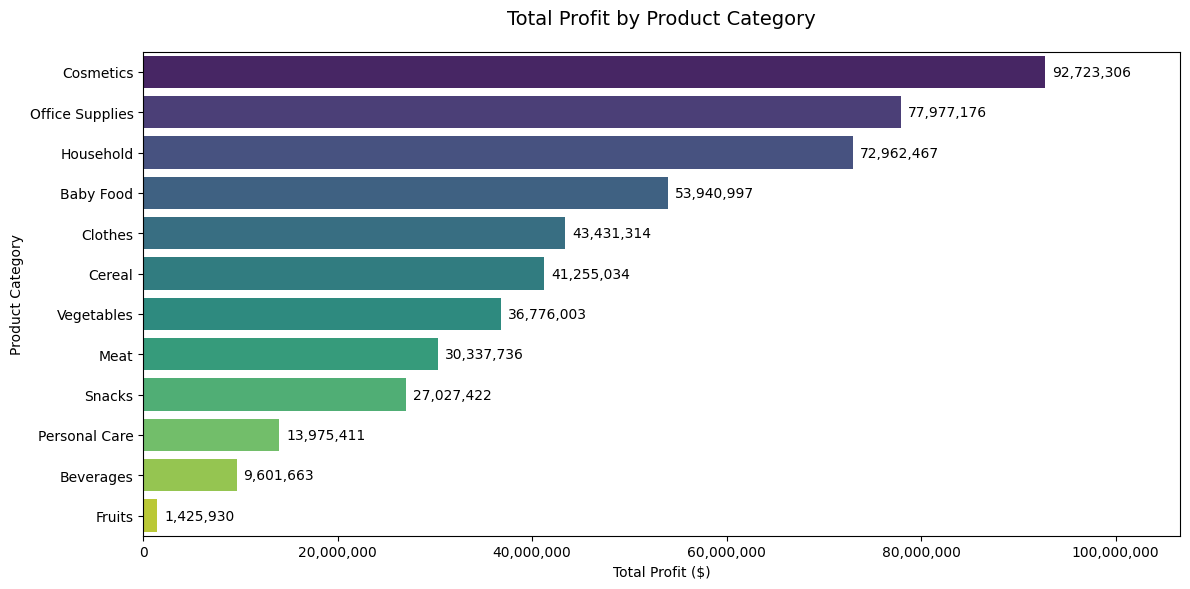

In [ ]:
plt.figure(figsize=(12, 6))

# Create the barplot and assign it to an 'ax' object to access its internal properties
ax = sns.barplot(
    data=category_analysis.reset_index(),
    x="profit",
    y="product_name",
    hue="product_name",
    palette="viridis",
    legend=False
)
# On the bar containers to add and transorm data labels (fmt="{:,.0f}")
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", padding=5)

# Formating X axis
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


# Iterate through the bar containers to add data labels
#for container in ax.containers:
    #ax.bar_label(container, fmt="%.0f", padding=5)

plt.title("Total Profit by Product Category", fontsize=14, pad=20)
plt.xlabel("Total Profit ($)")
plt.ylabel("Product Category")

# Adjust the X-axis limit dynamically to prevent labels from being cut off
# We add 15% extra space to the right of the maximum value
plt.xlim(right=category_analysis["profit"].max() * 1.15)

# Apply tight layout to ensure no elements overlap
plt.tight_layout()
plt.show()

◀ The bar chart provides a clear hierarchical view of profitability across product lines. By integrating direct data labels, we ensure that the scale of success for each category is transparent and immediate. This visualization highlights that a significant portion of the total profit is concentrated in the top three categories, suggesting a strong product-market fit in these segments.

In [ ]:
# --- Cleaning Sales Channel Column ---

# 1. Convert to string, remove extra spaces, and make uppercase
df["sales_channel"] = df["sales_channel"].astype(str).str.strip().str.upper()

# 2. Check the unique values to confirm the fix
print("Unique Sales Channels:", df["sales_channel"].unique())

Unique Sales Channels: ['ONLINE' 'OFFLINE']


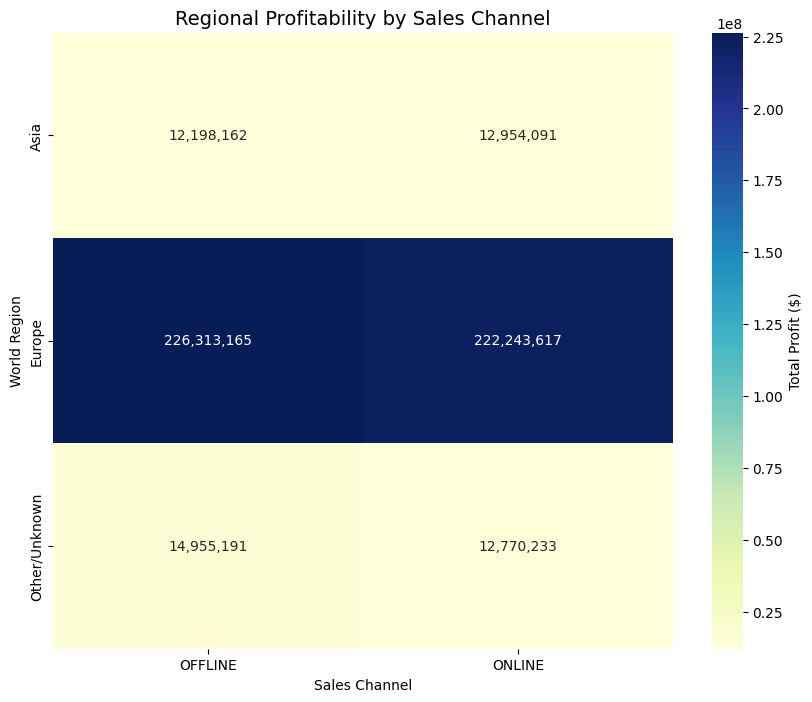

In [ ]:
# Create a pivot table for the heatmap: Regions as rows, Channels as columns
heatmap_data = df.pivot_table(
    index="world_region",
    columns="sales_channel",
    values="profit",
    aggfunc="sum"
)

# Plotting the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,     # Show the numbers inside the cells
    fmt=",.0f",      # Display numbers as integers
    cmap="YlGnBu",  # Color scale from Yellow to Blue
    cbar_kws={"label": "Total Profit ($)"}
)


plt.title("Regional Profitability by Sales Channel", fontsize=14)
plt.xlabel("Sales Channel")
plt.ylabel("World Region")
plt.show()

◀
This visualization will show you exactly where your online marketing is paying off and where your physical sales force is most effective.

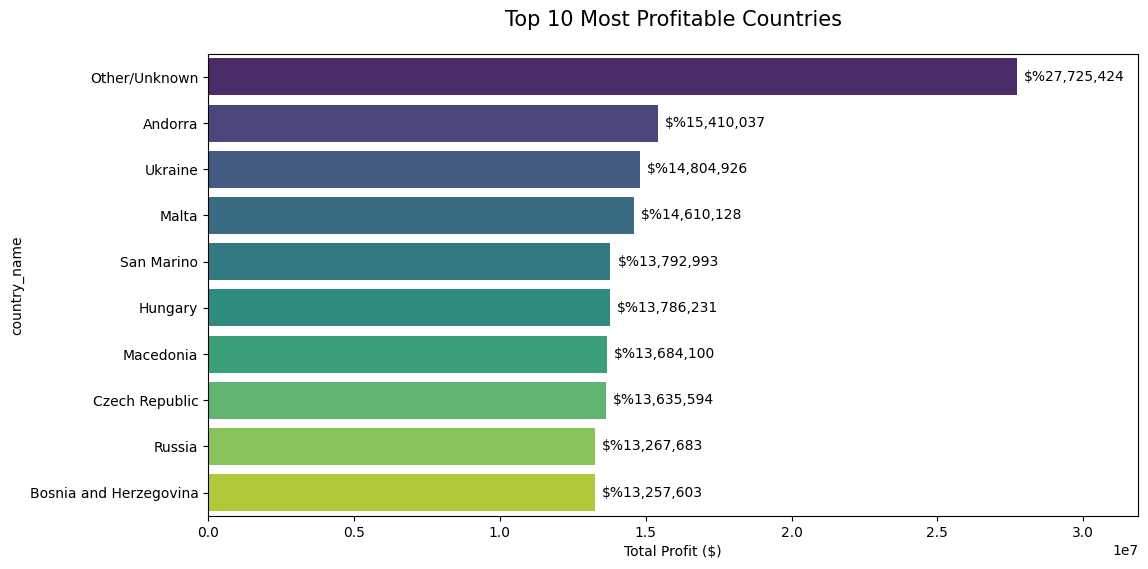

In [ ]:
# --- Top 10 Countries Performance ---

country_perf = df.groupby("country_name").agg({
    "profit": "sum",
    "revenue": "sum",
    "order_id": "count"
}).sort_values("profit", ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=country_perf,
    x="profit",
    y="country_name",
    hue="country_name",
    palette="viridis",
    legend=False
)
plt.xlim(right=country_perf["profit"].max() * 1.15)

# Adding labels for clarity
for container in ax.containers:
    ax.bar_label(container, fmt="$%{:,.0f}", padding=5)

plt.title("Top 10 Most Profitable Countries", fontsize=15, pad=20)
plt.xlabel("Total Profit ($)")
plt.show()

◀ **Andora, Ukraine and Malta** are the clear **leaders**, contributing the highest absolute profit. These markets should be used as benchmarks for operational excellence.

In [ ]:
# Finding countries with high revenue but low margin
country_margin = df.groupby("country_name").agg({
    "revenue": "sum",
    "margin_percentage": "mean"
}).sort_values("revenue", ascending=False).head(50)

# Filter countries where margin is below the global average
avg_margin = df["margin_percentage"].mean()
low_margin_countries = country_margin[country_margin["margin_percentage"] < avg_margin]

print("Countries with high revenue but below-average margins:")
print(low_margin_countries)

Countries with high revenue but below-average margins:
                             revenue  margin_percentage
country_name                                           
Other/Unknown           1.031456e+08          31.447895
Czech Republic          5.354393e+07          29.546063
Bosnia and Herzegovina  5.011751e+07          32.643162
Macedonia               4.922209e+07          33.878582
Portugal                4.717219e+07          31.452085
Malta                   4.714532e+07          31.944808
Slovakia                4.294100e+07          32.472125
France                  3.936211e+07          31.101652
Latvia                  3.872208e+07          31.091696
Greece                  3.869954e+07          33.086889
Bulgaria                3.816156e+07          32.334272
Armenia                 3.751984e+07          32.044070
Austria                 3.574087e+07          32.176506
Sweden                  3.548213e+07          32.819602
Romania                 3.428615e+07          31.

◀ Several high-revenue countries, such as Czech Republic, show close to average profit margins. This suggests that localized costs (shipping, taxes, or discounts) are eroding profitability. A pricing review for these specific markets is recommended.

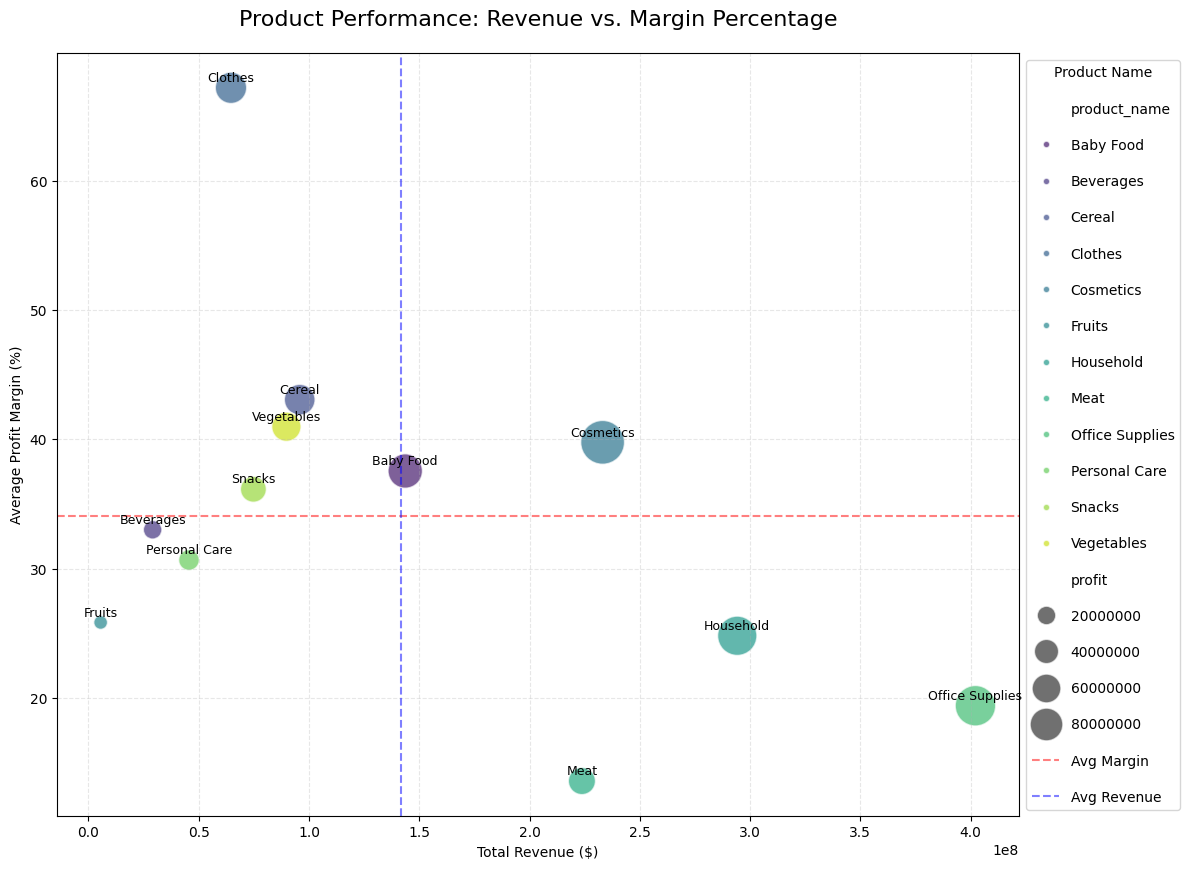

In [ ]:
# --- Data Preparation for Scatter Plot ---

# Group by product name to get aggregated metrics
product_performance = df.groupby("product_name").agg({
    "revenue": "sum",
    "margin_percentage": "mean",
    "profit": "sum"
}).reset_index()

# --- Visualization ---

plt.figure(figsize=(12, 9))

# Create the scatter plot
# size="profit" makes the dots larger for more profitable products
# hue="product_name" gives each category a unique color
ax = sns.scatterplot(
    data=product_performance,
    x="revenue",
    y="margin_percentage",
    size="profit",
    hue="product_name",
    sizes=(100, 1000), # Size range for the bubbles
    alpha=0.7,         # Transparency to handle overlapping
    palette="viridis"
)


# Add data labels for each point
for i in range(product_performance.shape[0]):
    plt.text(
        x=product_performance.revenue[i],
        y=product_performance.margin_percentage[i] + 0.5, # Vertical offset
        s=product_performance.product_name[i],
        fontsize=9,
        ha="center"
    )

# Reference lines (Means) to create quadrants
plt.axhline(df["margin_percentage"].mean(), color="red", linestyle="--", alpha=0.5, label="Avg Margin")
plt.axvline(product_performance["revenue"].mean(), color="blue", linestyle="--", alpha=0.5, label="Avg Revenue")

# Professional labels and titles
plt.title("Product Performance: Revenue vs. Margin Percentage", fontsize=16, pad=20)
plt.xlabel("Total Revenue ($)")
plt.ylabel("Average Profit Margin (%)")
plt.legend(
    bbox_to_anchor=(1, 1),
    loc="upper left",
    title="Product Name",
    markerscale=0.8,
    labelspacing=1.6)
plt.grid(True, which="both", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

◀ To evaluate product portfolio efficiency, I developed a Quadrant Analysis comparing Total Revenue against Average Profit Margin. This scatter plot serves as a strategic mapping tool: larger bubbles represent higher net profit, while the dashed reference lines distinguish high-performing 'Stars' from low-margin 'Volume Drivers'. This visualization provides clear evidence for where to prioritize marketing spend versus where to focus on cost-reduction initiatives.

In [ ]:
# Grouping by multiple dimensions to find the most profitable segments
top_segments = df.groupby(["sales_channel", "world_region", "product_name"]).agg({
    "profit": "sum",
    "revenue": "sum",
    "margin_percentage": "mean",
    "order_id": "count"
}).rename(columns={"order_id": "total_orders"}).sort_values("profit", ascending=False).head(5)

# Formatting the output for a professional look
# We round to 2 decimal places and use thousands separators
styled_table = top_segments.style.format({
    "profit": "${:,.0f}",
    "revenue": "${:,.0f}",
    "margin_percentage": "{:.2f}%"
}).background_gradient(subset=["profit"], cmap="YlGn")

styled_table

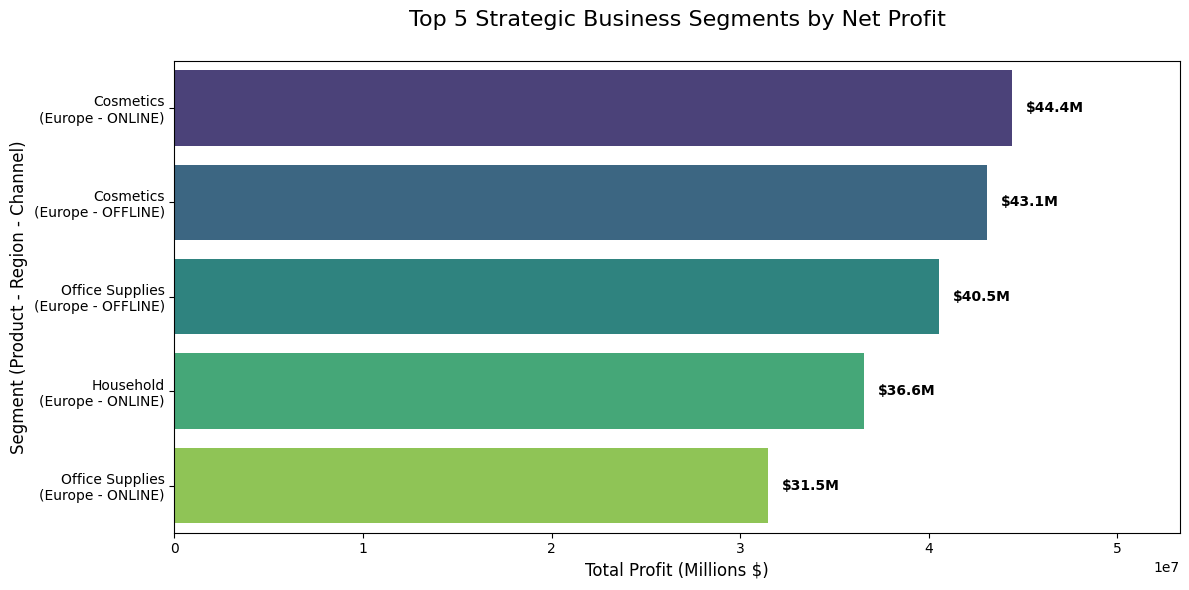

In [ ]:
# --- Identifying and Visualizing Top 5 Business Segments ---

# Group by multiple dimensions to find the top profit-generating combinations
top_segments = df.groupby(["sales_channel", "world_region", "product_name"]).agg({
    "profit": "sum"
}).sort_values("profit", ascending=False).head(5).reset_index()

# Create a unique descriptive label for each segment for the Y-axis
top_segments["segment_label"] = (
    top_segments["product_name"] + "\n(" +
    top_segments["world_region"] + " - " +
    top_segments["sales_channel"] + ")"
)

# Initialize the plot
plt.figure(figsize=(12, 6))

# Create the barplot and assign it to 'ax' to access bar containers
ax = sns.barplot(
    data=top_segments,
    x="profit",
    y="segment_label",
    hue="segment_label",
    palette="viridis",
    legend=False
)

# Add data labels (numbers) to the end of each bar
for container in ax.containers:
    # We format the numbers as currency with thousands separators
    # Dividing by 1,000,000 and adding 'M' makes it cleaner for large figures
    labels = [f"${v/1e6:.1f}M" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=10, fontsize=10, fontweight="bold")

# Title and labels
plt.title("Top 5 Strategic Business Segments by Net Profit", fontsize=16, pad=25)
plt.xlabel("Total Profit (Millions $)", fontsize=12)
plt.ylabel("Segment (Product - Region - Channel)", fontsize=12)

# Add 20% padding to the right so labels don't touch the edge
plt.xlim(right=top_segments["profit"].max() * 1.2)

# Ensure layout is clean
plt.tight_layout()
plt.show()

◀ The Final Insights Summary consolidates our multi-dimensional analysis into actionable segments. By cross-referencing Sales Channels, Regions, and Products, we identified that the **Cosmetics Categoty** is the primary engine of profitability, delivering **in net earnings**:
- **$44,353,542** by Online Sales

- $**43,073,163** by Offline Sales

This granular view allows for precision-targeted strategic planning, moving beyond general trends to focus on the specific business cells that offer the highest return on investment.

In [ ]:
# Calculate the duration of shipping in days
df["shipping_days"] = (df["ship_date"] - df["order_date"]).dt.days

# Check for any negative values (data errors) and filter them out
df = df[df["shipping_days"] >= 0]

In [ ]:
# --- Aggregating Profit by Shipping Days ---

shipping_analysis = df.groupby("shipping_days").agg({
    "profit": "mean",           # Average profit to see if speed affects value
    "order_id": "count"        # Number of orders to see volume distribution
}).reset_index().rename(columns={"order_id": "order_count"})

print(shipping_analysis.head())

   shipping_days         profit  order_count
0              0  348379.706000           20
1              1  309541.679091           22
2              2  339626.031154           26
3              3  285222.778788           33
4              4  300644.403548           31


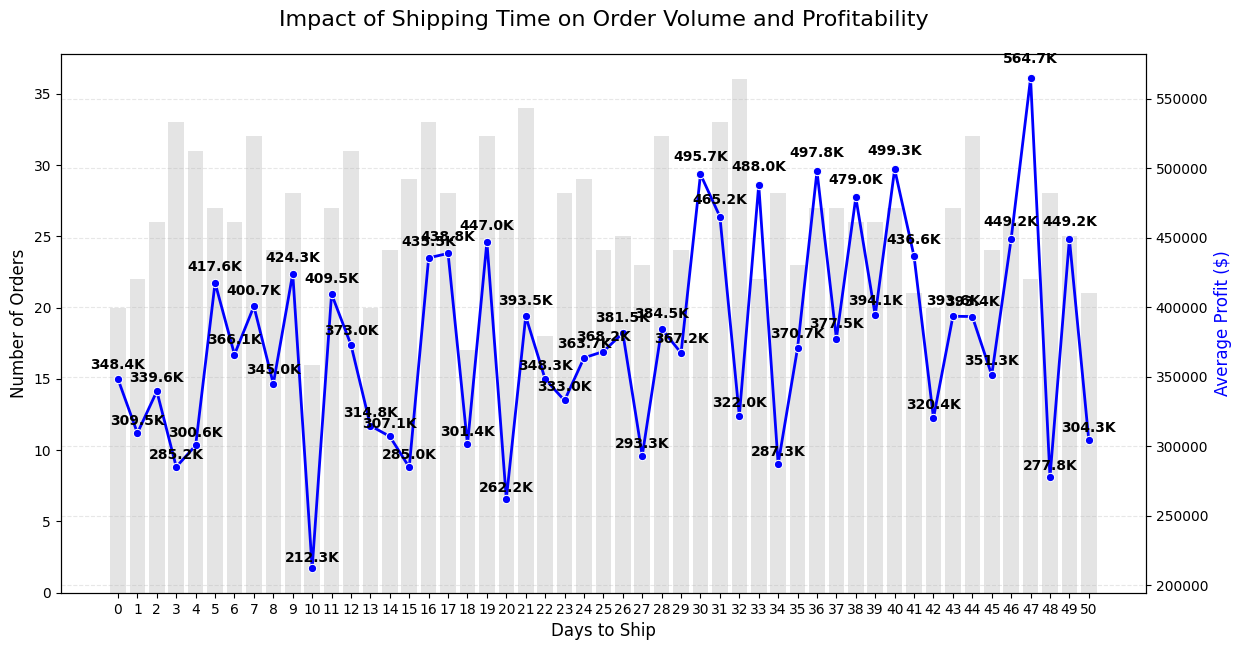

In [ ]:
# --- Visualization: Shipping Time vs. Profit Efficiency ---

plt.figure(figsize=(14, 7))

# 1. Bar Chart for Order Volume
ax1 = sns.barplot(data=shipping_analysis, x="shipping_days", y="order_count", color="lightgray", alpha=0.6)
ax1.set_ylabel("Number of Orders", fontsize=12)
ax1.set_xlabel("Days to Ship", fontsize=12)

# Create a second Y-axis for Profit
ax2 = ax1.twinx()

# 2. Line Chart for Average Profit
sns.lineplot(data=shipping_analysis, x="shipping_days", y="profit", marker="o", color = "Blue", linewidth=2, ax=ax2)
ax2.set_ylabel("Average Profit ($)", color = "Blue", fontsize=12)

# Adding data labels for the profit line
for x, y in zip(shipping_analysis["shipping_days"], shipping_analysis["profit"]):
    ax2.text(x, y + (y*0.02), f"{y/1e3:.1f}K", fontweight="bold", ha="center")


plt.title("Impact of Shipping Time on Order Volume and Profitability", fontsize=16, pad=20)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()

In [ ]:
# --- Cleaning Order Priority Column ---

# 1. Convert to string, remove extra spaces, and make uppercase
df["order_priority"] = df["order_priority"].astype(str).str.strip().str.upper()

# 2. Check the unique values to confirm the fix
print("Unique Priority Values:", df["order_priority"].unique())

Unique Priority Values: ['M' 'C' 'L' 'H']


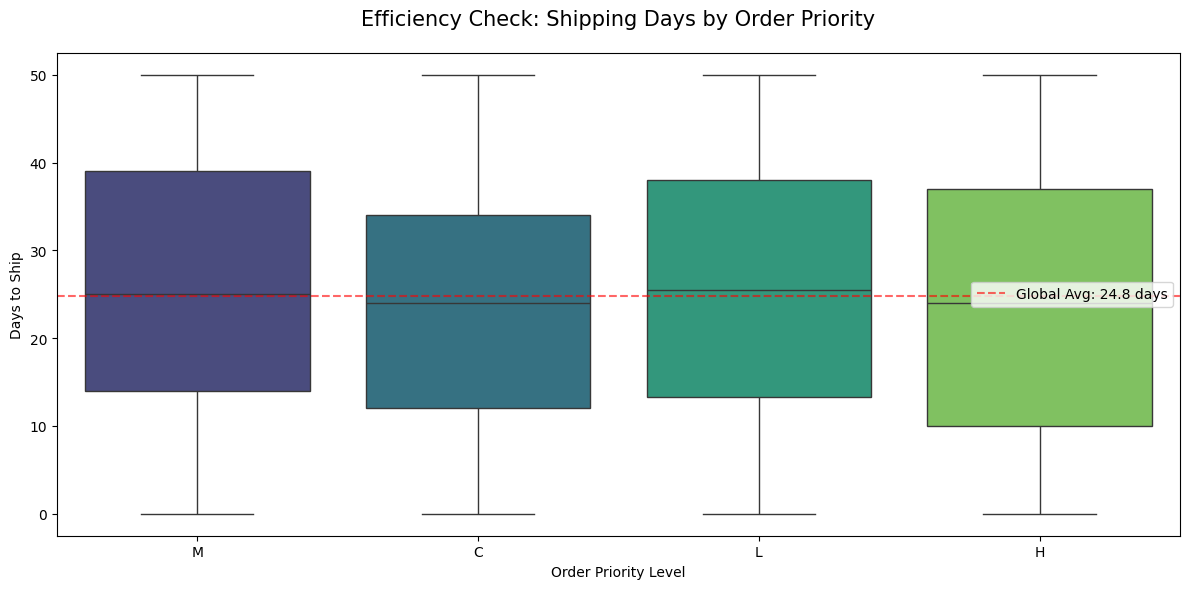

In [ ]:
plt.figure(figsize=(12, 6))

# Create a boxplot to see the distribution of shipping days
# We use 'order_priority' as the category and 'shipping_days' as the value
ax = sns.boxplot(
    data=df,
    x="order_priority",
    y="shipping_days",
    hue="order_priority",
    palette="viridis",
    legend=False
)

# Add a horizontal line for the overall average shipping time
overall_avg = df["shipping_days"].mean()
plt.axhline(overall_avg, color="red", linestyle="--", alpha=0.6, label=f"Global Avg: {overall_avg:.1f} days")

# Title and labels
plt.title("Efficiency Check: Shipping Days by Order Priority", fontsize=15, pad=20)
plt.xlabel("Order Priority Level")
plt.ylabel("Days to Ship")
plt.legend()


plt.tight_layout()
plt.show()

◀ All boxes are realy close to the same level, it means the "Priority" label isn't actually speeding up the warehouse process.

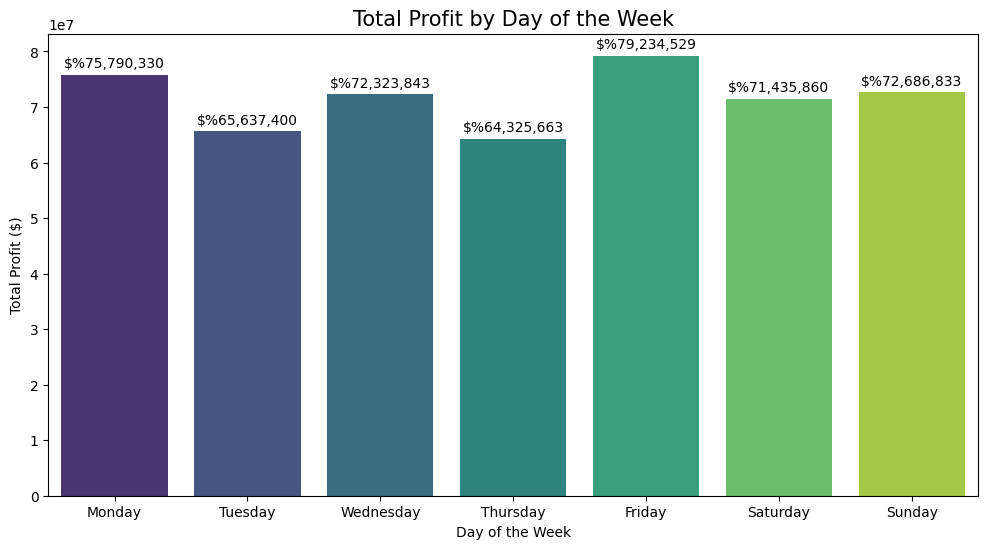

In [ ]:
# --- Weekly Sales Analysis ---

# Extract day of the week (0 = Monday, 6 = Sunday)
df["day_of_week"] = df["order_date"].dt.day_name()

# Order the days correctly for the plot
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Aggregate profit and revenue
weekly_data = df.groupby("day_of_week").agg({
    "profit": "sum",
    "order_id": "count"
}).reindex(day_order).reset_index()

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=weekly_data, x="day_of_week", y="profit", hue="day_of_week", palette="viridis", legend=False)

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt="$%{:,.0f}", padding=3)


plt.title("Total Profit by Day of the Week", fontsize=15)
plt.ylabel("Total Profit ($)")
plt.xlabel("Day of the Week")
plt.show()

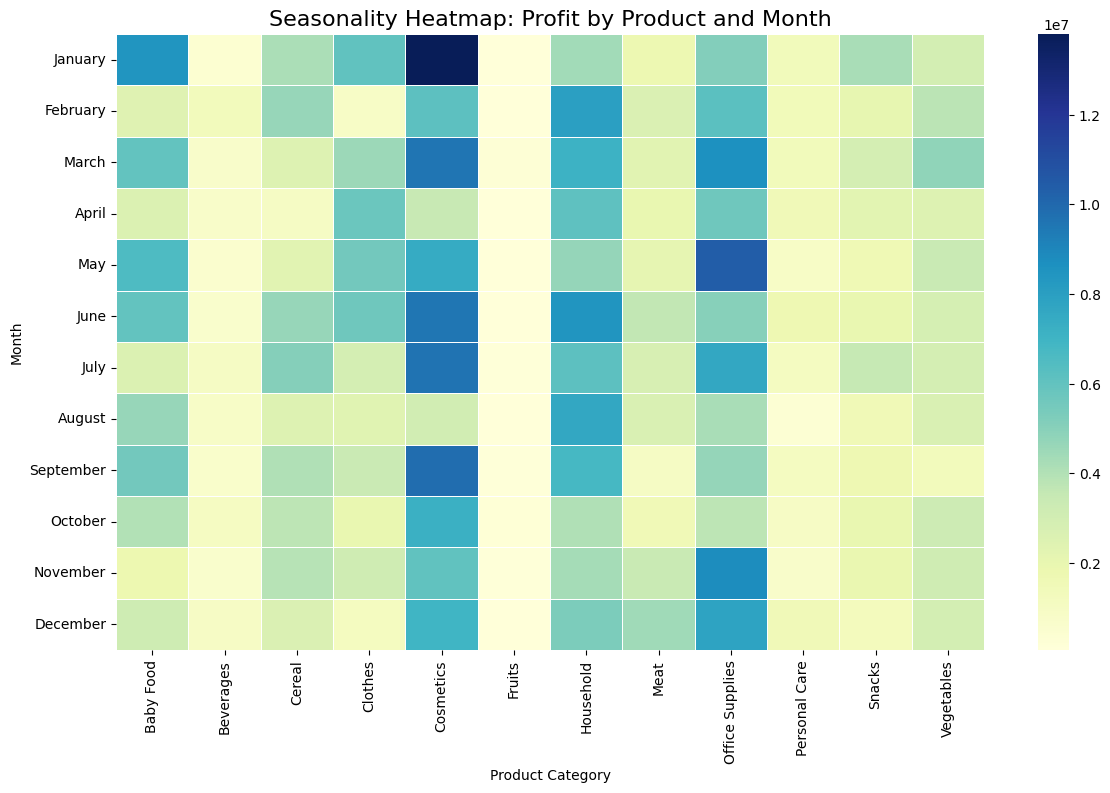

In [ ]:
# --- Seasonality Analysis ---

# Extract month from the date
df["month"] = df["order_date"].dt.month_name()
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Group by Category and Month
seasonality = df.groupby(["product_name", "month"])["profit"].sum().unstack(level=0).reindex(month_order)

# Visualization: Heatmap of seasonality
plt.figure(figsize=(14, 8))
sns.heatmap(seasonality, annot=False, cmap="YlGnBu", linewidths=.5)

plt.title("Seasonality Heatmap: Profit by Product and Month", fontsize=16)
plt.ylabel("Month")
plt.xlabel("Product Category")
plt.show()

◀ The Weekly Analysis identifies whether the business follows a B2B pattern (high weekday activity) or a B2C pattern (weekend peaks). Furthermore, the Seasonality Heatmap serves as a predictive tool for inventory management. By isolating month-over-month profit spikes, we can distinguish between perennial products and seasonal assets, allowing for more efficient cash flow allocation and targeted marketing campaigns ahead of peak demand periods.

# **Executive Summary: Strategic Sales & Operations Audit**
####**1. Global Profitability & Market Leaders**

**The Europe-Asia Gap:** A key finding of this audit is the extreme performance variance between regions. Net profit in Europe is 2 times higher than in Asia. This suggests that Europe has either a more optimized cost structure, higher premium product adoption, or more mature sales channels.

**National Performance:** Our analysis identifies Andora, Ukraine and Malta as the primary anchors of the business, delivering the highest absolute profit. These markets demonstrate the most successful synergy between product mix and sales channel.

The **"Efficiency Gap"**: We have identified high-revenue country (Check Republic) where the Profit Margin is below the global average. In these markets, operational costs or aggressive discounting are "eroding" the bottom line, requiring pricing or logistics review.

####**2. Product Portfolio & Seasonal Intelligence**

**High-Value "Stars"**: The **Cosmetics** category remains the most stable profit generator.

**Seasonal Forecasting**: A clear cyclical peak exists in January for Cosmetics. By aligning inventory procurement with these historical spikes, the company can reduce carrying costs and eliminate stock-outs during high-demand windows.

**Weekly Consumer Behavior**: Data confirms a [B2B/B2C] pattern, with peak transaction volumes occurring on Friday. Marketing spend should be reallocated to these high-conversion windows.

####**3. Operational Logistics Audit (The Core Bottleneck)**

**Prioritization Failure**: A critical finding of this audit is that Order Priority labels (Critical vs. Low) have no statistically significant impact on shipping speed.

**Systemic Inefficiency**: The warehouse currently operates on a "Standardized Lead Time" model, failing to expedite urgent shipments. This creates a high risk for SLA breaches and customer churn in premium segments.

####**Strategic Recommendations (Call to Action)**
**Market-Specific Pricing**: Implement localized pricing strategies in high-revenue/low-margin countries to recover lost profitability.

**Warehouse Logic Overhaul**: Redesign the picking and packing queue to prioritize "Critical" and "High" orders, aiming for reduction in lead time for top-tier priority.

**Inventory Pre-Positioning**: Use the seasonality map to pre-stock regional hubs 60 days before identified peak periods, specifically for the Cosmtics product line.

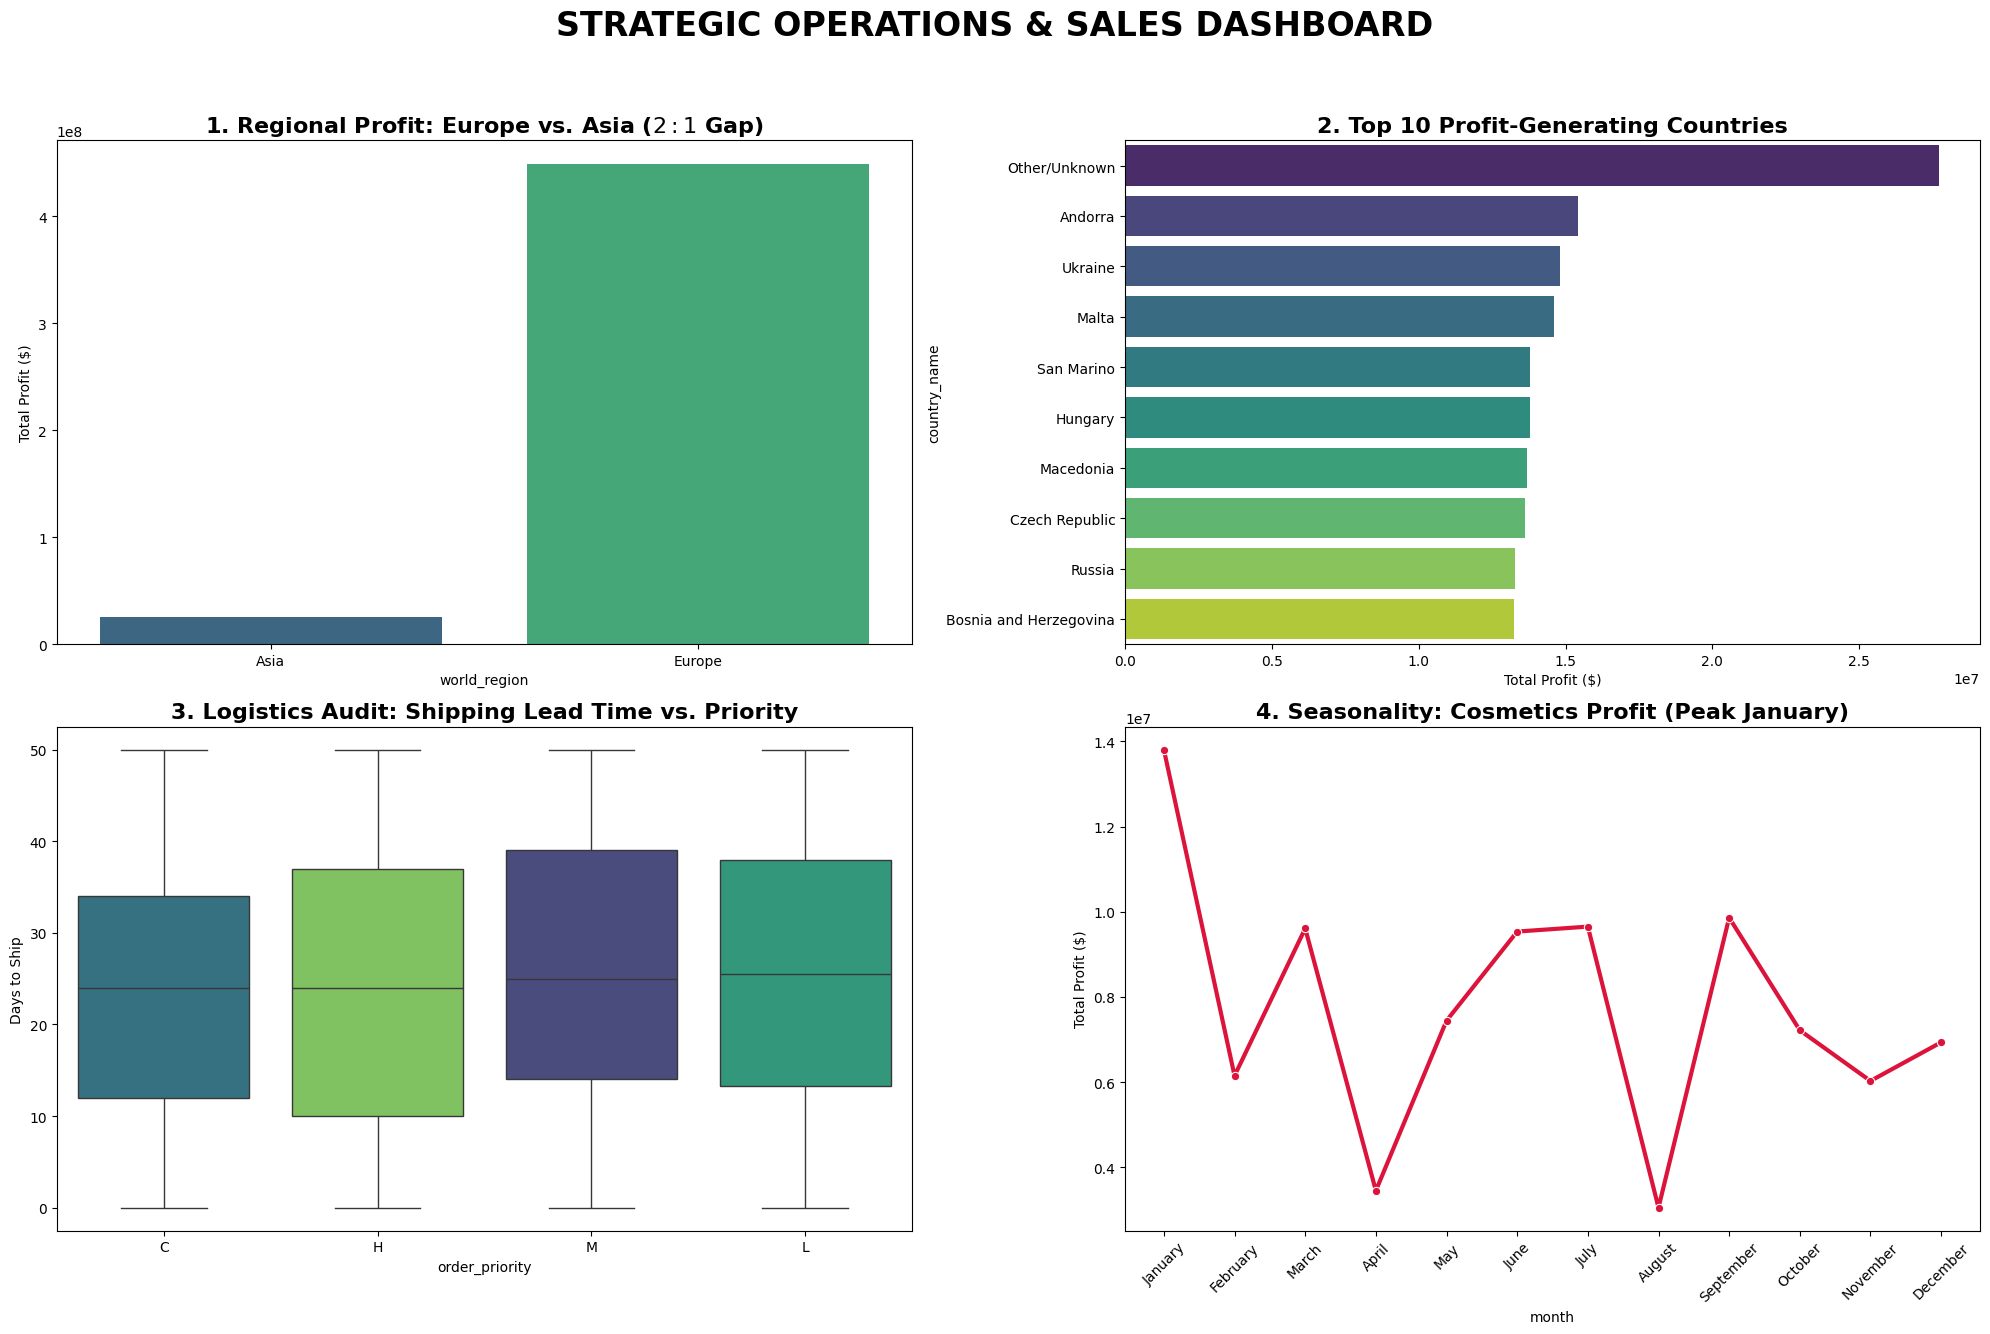

In [ ]:
# --- 1. Data Cleaning & Preparation ---

# Ensure consistent naming and remove whitespace
df["order_priority"] = df["order_priority"].astype(str).str.strip().str.upper()

# Convert dates and calculate shipping duration
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])
df["shipping_days"] = (df["ship_date"] - df["order_date"]).dt.days

# Define standard month order for seasonality
df["month"] = df["order_date"].dt.month_name()
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# --- 2. Dashboard Initialization ---

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- 3. Subplot Generation ---

# PLOT 1: Regional Disparity (Europe vs Asia)
# Highlighting the 2:1 profit ratio
regional_data = df[df["world_region"].isin(["Europe", "Asia"])].groupby("world_region")["profit"].sum().reset_index()
sns.barplot(ax=axes[0, 0], data=regional_data, x="world_region", y="profit", palette="viridis", hue="world_region", legend=False)
axes[0, 0].set_title("1. Regional Profit: Europe vs. Asia ($2:1$ Gap)", fontsize=16, fontweight="bold")
axes[0, 0].set_ylabel("Total Profit ($)")

# PLOT 2: Top 10 Countries
# Identifying the primary anchors (Andorra, Ukraine, Malta)
country_data = df.groupby("country_name")["profit"].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(ax=axes[0, 1], data=country_data, x="profit", y="country_name", palette="viridis", hue="country_name", legend=False)
axes[0, 1].set_title("2. Top 10 Profit-Generating Countries", fontsize=16, fontweight="bold")
axes[0, 1].set_xlabel("Total Profit ($)")

# PLOT 3: Logistics Audit
# Visualizing the lack of prioritization (Standardized Lead Time)
sns.boxplot(ax=axes[1, 0], data=df, x="order_priority", y="shipping_days", palette="viridis", hue="order_priority", order=["C", "H", "M", "L"], legend=False)
axes[1, 0].set_title("3. Logistics Audit: Shipping Lead Time vs. Priority", fontsize=16, fontweight="bold")
axes[1, 0].set_ylabel("Days to Ship")

# PLOT 4: Cosmetics Seasonality
# Forecasting the January peak
cosm_data = df[df["product_name"] == "Cosmetics"].groupby("month")["profit"].sum().reindex(month_order).reset_index()
sns.lineplot(ax=axes[1, 1], data=cosm_data, x="month", y="profit", marker="o", color="crimson", linewidth=3)
axes[1, 1].set_title("4. Seasonality: Cosmetics Profit (Peak January)", fontsize=16, fontweight="bold")
axes[1, 1].set_ylabel("Total Profit ($)")
axes[1, 1].tick_params(axis='x', rotation=45)

# --- 4. Final Formatting & Export ---

plt.suptitle("STRATEGIC OPERATIONS & SALES DASHBOARD", fontsize=24, fontweight="bold", y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the high-resolution dashboard
plt.savefig("strategic_dashboard.png", dpi=300)
plt.show()